In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame
from random import shuffle
import seaborn as sns
from IPython.display import display, HTML

display(HTML("<style>.container{ width:95% !important;}</style>"))

In [2]:
stemdegree = pd.read_excel('../data/stemdegrees2020clean.xlsx')
display(stemdegree)

,Sex and year,Total Number,White Number,Black Number,His- panic Number,Asian Number,Pacific Islander Number,American Indian/ Alaska Native Number,Two or more races Number,Non-resident alien Number,Total Percent,White Percent,Black Percent,His- panic Percent,Asian Percent,Pacific Islander Percent,American Indian/ Alaska Native Percent,Two or more races Percent,Type
0,1.0,2.0,3.0,4.0,5.0,7.0,8.0,9.0,10.0,11.0,12.0,13.000000,14.000000,15.000000,17.000000,18.000000,19.000000,20.000000,NaN
1,NaN,"Total, all levels of degrees/certificates",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-11,531018.0,319327.0,47014.0,45794.0,50250.0,1211.0,3601.0,5551.0,58270.0,100.0,67.546981,9.944833,9.686768,10.629342,0.256162,0.761717,1.174199,Total
4,2011-12,556696.0,333652.0,47004.0,49262.0,52336.0,1334.0,3600.0,7388.0,62120.0,100.0,67.462230,9.503898,9.960451,10.581993,0.269726,0.727896,1.493805,Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2017-18,10194.0,4444.0,367.0,477.0,859.0,9.0,16.0,202.0,3820.0,100.0,69.720741,5.757766,7.483527,13.476624,0.141199,0.251020,3.169125,NaN
203,2018-19,10165.0,4228.0,338.0,506.0,895.0,9.0,20.0,241.0,3928.0,100.0,67.789001,5.419272,8.112875,14.349848,0.144300,0.320667,3.864037,NaN
204,2019-20,10168.0,4205.0,339.0,512.0,813.0,8.0,15.0,256.0,4020.0,100.0,68.396226,5.513988,8.327912,13.223813,0.130124,0.243982,4.163956,NaN
205,NOTE: Data in this table represent the 50 stat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def cast_to_single_year(string_with_years):
    """converts a string to a number by removing commas and percentage signs
    """
    last_two_digits = string_with_years[5:]
    full_year = '20' + last_two_digits
    number = float(full_year)
    return number

def cast_to_number(string_with_symbols):
    """converts a string to a number by removing commas and percentage signs
    """
    if isinstance(string_with_symbols, float):  # already a number!
        return string_with_symbols
    no_commas = string_with_symbols.replace(',', '')
    no_percent = no_commas.replace('%', '')
    number = float(no_percent)
    return number

def cast_to_float(integer):
    """converts a string to a number by removing commas and percentage signs
    """
    if isinstance(integer, float):  # already a number!
        return integer
    number = float(integer)
    return number

In [4]:
totalstemdegree = stemdegree[stemdegree['Type'] == 'Total']
fstemdegree = stemdegree[stemdegree['Type'] == 'Females']
mstemdegree = stemdegree[stemdegree['Type'] == 'Males']

In [5]:
totalstemdegree['Sex and year'] = totalstemdegree['Sex and year'].apply(cast_to_single_year)
totalstemdegree['Total Number'] = totalstemdegree['Total Number'].apply(cast_to_number)

mstemdegree['Sex and year'] = mstemdegree['Sex and year'].apply(cast_to_single_year)
mstemdegree['Total Number'] = mstemdegree['Total Number'].apply(cast_to_number)

fstemdegree['Sex and year'] = fstemdegree['Sex and year'].apply(cast_to_single_year)
fstemdegree['Total Number'] = fstemdegree['Total Number'].apply(cast_to_number)

C:\Users\Srikar\AppData\Local\Temp\ipykernel_49576\192473017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalstemdegree['Sex and year'] = totalstemdegree['Sex and year'].apply(cast_to_single_year)
C:\Users\Srikar\AppData\Local\Temp\ipykernel_49576\192473017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalstemdegree['Total Number'] = totalstemdegree['Total Number'].apply(cast_to_number)
C:\Users\Srikar\AppData\Local\Temp\ipykernel_49576\192473017.py:4: SettingWithCopyWarning: 
A value is tr

In [6]:
degree = pd.read_excel('../data/degreesclean.xls')
degree.rename(columns = {'Unnamed: 0':'Race'}, inplace = True)
display(degree)

,Race,Total,Male,Female
0,Total,5132514,2108819,3023695
1,White,2661973,1113401,1548572
2,Black or African American,559488,191248,368240
3,Hispanic or Latino,856369,328093,528276
4,Asian,328806,143312,185494
5,Native Hawaiian or Other Pacific Islander,11684,4852,6832
6,American Indian or Alaska Native,30412,11419,18993
7,Two or more races,169549,67080,102469
8,Nonresident alien,310291,165182,145109


In [7]:
totaldegree = degree[['Race','Total']].copy()
fdegree = degree[['Race','Female']].copy()
mdegree = degree[['Race','Male']].copy()


<AxesSubplot:>

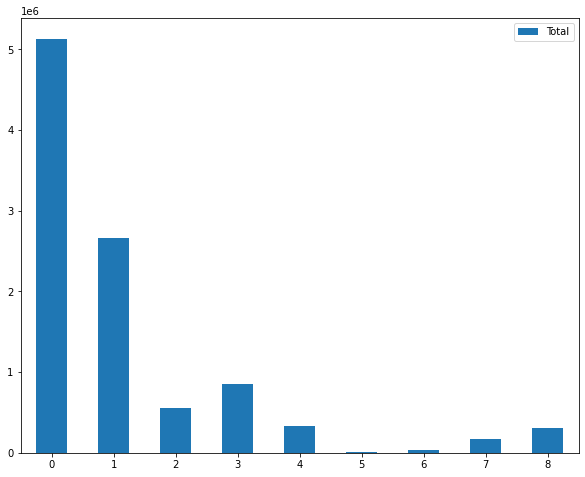

In [8]:
totaldegree.plot.bar(rot=0, figsize=(10,8))

In [9]:
df = totalstemdegree
df = df.drop('Type', axis='columns')
df = df.transpose()
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8]], axis='columns')
df = df.drop([df.index[0], df.index[10], df.index[11], df.index[12], df.index[13], df.index[14], df.index[15], df.index[16], df.index[17]])
df.set_axis(['STEM'], axis='columns', inplace=True)
df['STEM']

Total Number                             773971.0
White Number                             385132.0
Black Number                              55642.0
His- panic Number                         94927.0
Asian Number                              85135.0
Pacific Islander Number                    1254.0
American Indian/ Alaska Native Number      3007.0
Two or more races Number                  26464.0
Non-resident alien Number                122410.0
Name: STEM, dtype: float64

<AxesSubplot:>

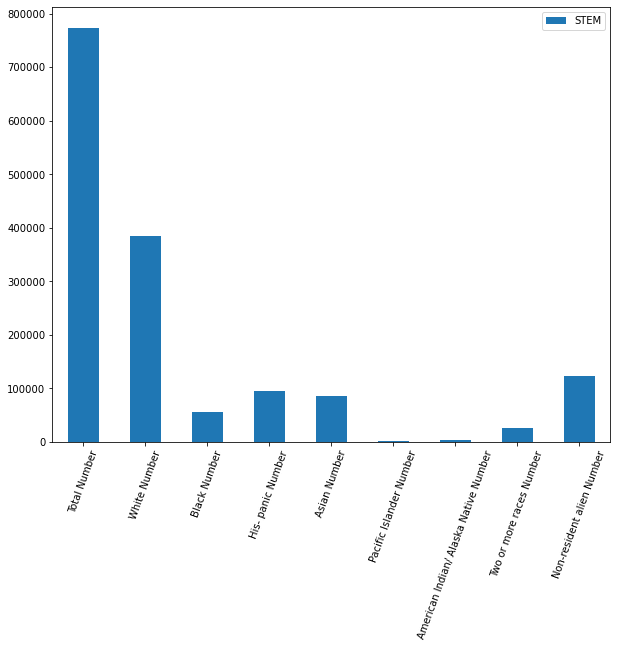

In [10]:
df.plot.bar(rot=70, figsize=(10,8))

In [11]:
df3 = df.copy()
df3['Total']= totaldegree['Total'].values
df3

,STEM,Total
Total Number,773971.0,5132514
White Number,385132.0,2661973
Black Number,55642.0,559488
His- panic Number,94927.0,856369
Asian Number,85135.0,328806
Pacific Islander Number,1254.0,11684
American Indian/ Alaska Native Number,3007.0,30412
Two or more races Number,26464.0,169549
Non-resident alien Number,122410.0,310291


<AxesSubplot:>

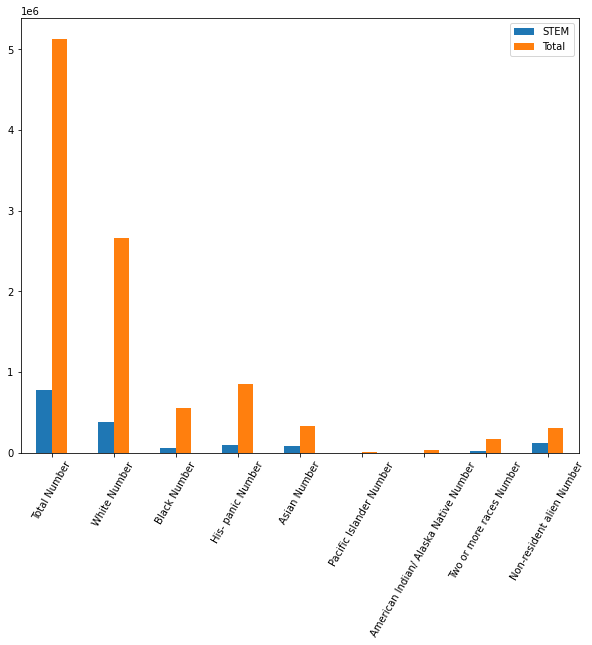

In [12]:
df3.plot.bar(rot=60, figsize=(10,8))

In [13]:
dfper = totalstemdegree
dfper = dfper.drop('Type', axis='columns')
dfper = dfper.transpose()
dfper = dfper.drop(dfper.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8]], axis='columns')
dfper = dfper.drop([dfper.index[0], df.index[1], df.index[2], df.index[3], df.index[4], df.index[5], df.index[6], df.index[7], df.index[8]])
dfper.set_axis(['STEM'], axis='columns', inplace=True)
dfper = dfper.drop([dfper.index[0], dfper.index[1]])

dfper

,STEM
White Percent,59.109124
Black Percent,8.539799
His- panic Percent,14.569165
Asian Percent,13.066313
Pacific Islander Percent,0.192461
American Indian/ Alaska Native Percent,0.461507
Two or more races Percent,4.061630


In [14]:
def cast_to_percent(number):
    """converts a string to a number by removing commas and percentage signs
    """
    percent = (number/5132514)*100
    return percent

def cast_to_fpercent(number):
    """converts a string to a number by removing commas and percentage signs
    """
    percent = (number/3023695)*100
    return percent

def cast_to_mpercent(number):
    """converts a string to a number by removing commas and percentage signs
    """
    percent = (number/2108819)*100
    return percent

degree['Total Percent'] = degree['Total'].apply(cast_to_percent)
degree['Male Percent'] = degree['Male'].apply(cast_to_mpercent)
degree['Female Percent'] = degree['Female'].apply(cast_to_fpercent)

degree

,Race,Total,Male,Female,Total Percent,Male Percent,Female Percent
0,Total,5132514,2108819,3023695,100.000000,100.000000,100.000000
1,White,2661973,1113401,1548572,51.864895,52.797371,51.214557
2,Black or African American,559488,191248,368240,10.900857,9.068962,12.178477
3,Hispanic or Latino,856369,328093,528276,16.685176,15.558139,17.471207
4,Asian,328806,143312,185494,6.406334,6.795842,6.134680
5,Native Hawaiian or Other Pacific Islander,11684,4852,6832,0.227647,0.230081,0.225949
6,American Indian or Alaska Native,30412,11419,18993,0.592536,0.541488,0.628139
7,Two or more races,169549,67080,102469,3.303430,3.180927,3.388867
8,Nonresident alien,310291,165182,145109,6.045595,7.832915,4.799062


In [15]:
totper = degree
totper = totper.drop(totper.columns[[1, 2, 3]], axis='columns')
totper = totper.drop([totper.index[0], totper.index[8]])
totper

,Race,Total Percent,Male Percent,Female Percent
1,White,51.864895,52.797371,51.214557
2,Black or African American,10.900857,9.068962,12.178477
3,Hispanic or Latino,16.685176,15.558139,17.471207
4,Asian,6.406334,6.795842,6.134680
5,Native Hawaiian or Other Pacific Islander,0.227647,0.230081,0.225949
6,American Indian or Alaska Native,0.592536,0.541488,0.628139
7,Two or more races,3.303430,3.180927,3.388867


In [16]:
totalpercents = dfper.copy()
totalpercents['Total']= totper['Total Percent'].values
totalpercents

,STEM,Total
White Percent,59.109124,51.864895
Black Percent,8.539799,10.900857
His- panic Percent,14.569165,16.685176
Asian Percent,13.066313,6.406334
Pacific Islander Percent,0.192461,0.227647
American Indian/ Alaska Native Percent,0.461507,0.592536
Two or more races Percent,4.061630,3.303430


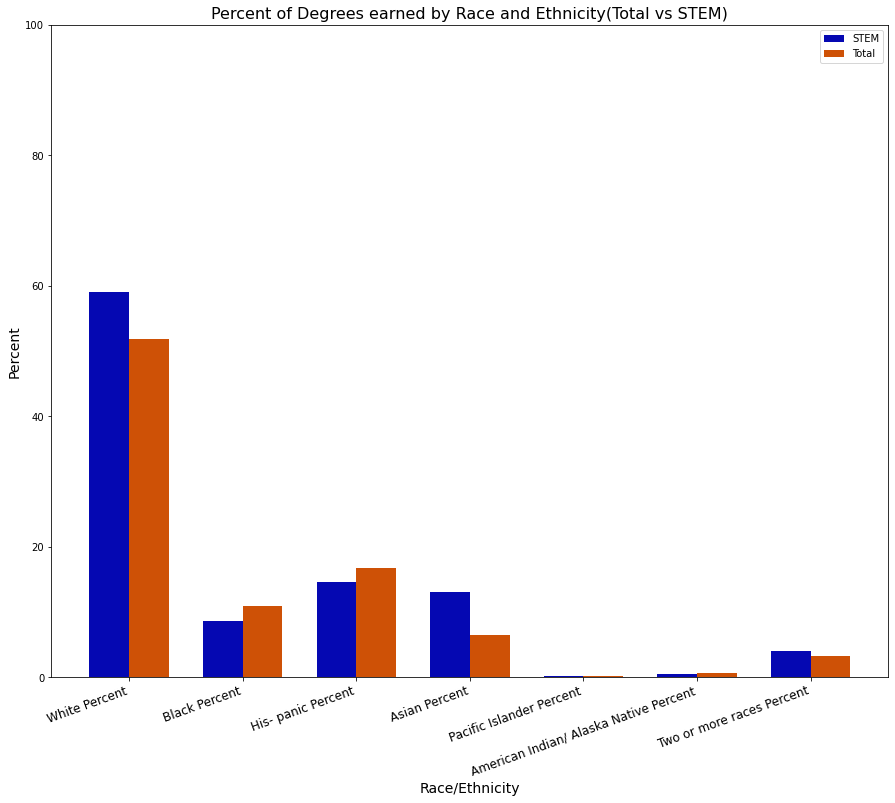

In [17]:
'''
This graph is for research paper
'''
labels = totalpercents.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*0.5, totalpercents['STEM'], width, label='STEM', color='#0508b2')
rects2 = ax.bar(x + width*0.5, totalpercents['Total'], width, label='Total', color='#ce5106')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent', fontsize=14)
ax.set_xlabel('Race/Ethnicity', fontsize=14)
ax.set_title('Percent of Degrees earned by Race and Ethnicity(Total vs STEM)', fontsize=16)
ax.set_xticks(x, labels, ha='right', fontsize=12)
ax.legend()
ax.set_ylim(0,100)


# ax.bar_label(rects1, padding=9)
# ax.bar_label(rects2, padding=0)

# fig.tight_layout()
fig.set_size_inches(15, 12)

plt.xticks(rotation=20)

plt.show()

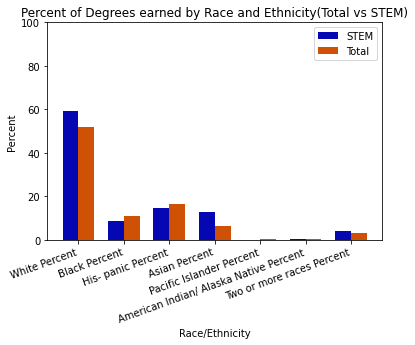

In [18]:
'''
This graph is for research presentation
'''
labels = totalpercents.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*0.5, totalpercents['STEM'], width, label='STEM', color='#0508b2')
rects2 = ax.bar(x + width*0.5, totalpercents['Total'], width, label='Total', color='#ce5106')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_xlabel('Race/Ethnicity')
ax.set_title('Percent of Degrees earned by Race and Ethnicity(Total vs STEM)')
ax.set_xticks(x, labels, ha='right')
ax.legend()
ax.set_ylim(0,100)


# ax.bar_label(rects1, padding=9)
# ax.bar_label(rects2, padding=0)

# fig.tight_layout()

plt.xticks(rotation=20)

plt.show()

(0.0, 100.0)

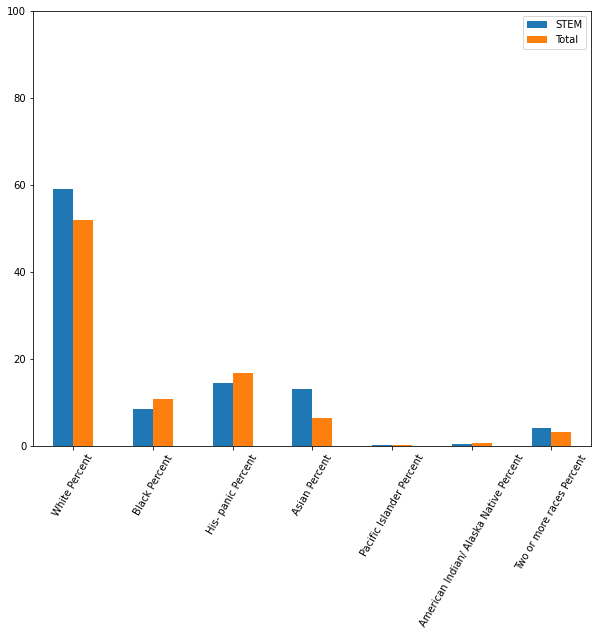

In [19]:
ax = totalpercents.plot.bar(rot=60, figsize=(10,8))
ax.set_ylim(0,100)

In [20]:
femstemper = fstemdegree
femstemper = femstemper.drop('Type', axis='columns')
femstemper = femstemper.transpose()
femstemper = femstemper.drop(femstemper.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8]], axis='columns')
femstemper = femstemper.drop([femstemper.index[0], femstemper.index[1], femstemper.index[2], femstemper.index[3], femstemper.index[4], femstemper.index[5], femstemper.index[6], femstemper.index[7], femstemper.index[8]])
femstemper.set_axis(['STEM'], axis='columns', inplace=True)
femstemper = femstemper.drop([femstemper.index[0], femstemper.index[1]])

femstemper

,STEM
White Percent,54.913107
Black Percent,9.984447
His- panic Percent,14.860363
Asian Percent,15.065930
Pacific Islander Percent,0.189789
American Indian/ Alaska Native Percent,0.447199
Two or more races Percent,4.539164


In [21]:
femalepercents = dfper.copy()
femalepercents['Total Female']= totper['Female Percent'].values
femalepercents

,STEM,Total Female
White Percent,59.109124,51.214557
Black Percent,8.539799,12.178477
His- panic Percent,14.569165,17.471207
Asian Percent,13.066313,6.134680
Pacific Islander Percent,0.192461,0.225949
American Indian/ Alaska Native Percent,0.461507,0.628139
Two or more races Percent,4.061630,3.388867


(0.0, 100.0)

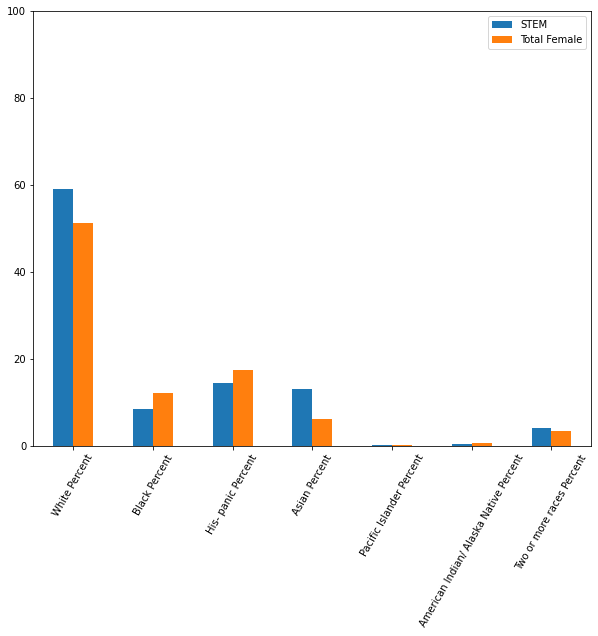

In [22]:
ax1 = femalepercents.plot.bar(rot=60, figsize=(10,8))
ax1.set_ylim(0,100)

In [23]:

def cast_to_totalpercent(number):

    i=0

    while i<9:
        percent = (number/degree.at[i, 'Total'])*100
        i+=1
        return percent

In [24]:
degreetest = degree.copy()
degreetest

,Race,Total,Male,Female,Total Percent,Male Percent,Female Percent
0,Total,5132514,2108819,3023695,100.000000,100.000000,100.000000
1,White,2661973,1113401,1548572,51.864895,52.797371,51.214557
2,Black or African American,559488,191248,368240,10.900857,9.068962,12.178477
3,Hispanic or Latino,856369,328093,528276,16.685176,15.558139,17.471207
4,Asian,328806,143312,185494,6.406334,6.795842,6.134680
5,Native Hawaiian or Other Pacific Islander,11684,4852,6832,0.227647,0.230081,0.225949
6,American Indian or Alaska Native,30412,11419,18993,0.592536,0.541488,0.628139
7,Two or more races,169549,67080,102469,3.303430,3.180927,3.388867
8,Nonresident alien,310291,165182,145109,6.045595,7.832915,4.799062


In [25]:
i=0

while i<9:
    percent = (degreetest.at[i, 'Female']/degreetest.at[i, 'Total'])*100
    degreetest.at[i, 'Fem Tot Per'] = percent
    i+=1



In [26]:
i=0

while i<9:
    percent = (degreetest.at[i, 'Male']/degreetest.at[i, 'Total'])*100
    degreetest.at[i, 'Male Tot Per'] = percent
    i+=1

In [27]:
degreetest

,Race,Total,Male,Female,Total Percent,Male Percent,Female Percent,Fem Tot Per,Male Tot Per
0,Total,5132514,2108819,3023695,100.000000,100.000000,100.000000,58.912552,41.087448
1,White,2661973,1113401,1548572,51.864895,52.797371,51.214557,58.173843,41.826157
2,Black or African American,559488,191248,368240,10.900857,9.068962,12.178477,65.817319,34.182681
3,Hispanic or Latino,856369,328093,528276,16.685176,15.558139,17.471207,61.687894,38.312106
4,Asian,328806,143312,185494,6.406334,6.795842,6.134680,56.414421,43.585579
5,Native Hawaiian or Other Pacific Islander,11684,4852,6832,0.227647,0.230081,0.225949,58.473126,41.526874
6,American Indian or Alaska Native,30412,11419,18993,0.592536,0.541488,0.628139,62.452321,37.547679
7,Two or more races,169549,67080,102469,3.303430,3.180927,3.388867,60.436216,39.563784
8,Nonresident alien,310291,165182,145109,6.045595,7.832915,4.799062,46.765456,53.234544


In [28]:
df6 = totalstemdegree.copy()
df6 = df6.drop('Type', axis='columns')
df6 = df6.transpose()
df6 = df6.drop(df6.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8]], axis='columns')
df6 = df6.drop([df6.index[0], df6.index[10], df6.index[11], df6.index[12], df6.index[13], df6.index[14], df6.index[15], df6.index[16], df6.index[17]])
df6.set_axis(['STEM'], axis='columns', inplace=True)

df6

,STEM
Total Number,773971.0
White Number,385132.0
Black Number,55642.0
His- panic Number,94927.0
Asian Number,85135.0
Pacific Islander Number,1254.0
American Indian/ Alaska Native Number,3007.0
Two or more races Number,26464.0
Non-resident alien Number,122410.0


In [29]:
df7 = fstemdegree.copy()
df7 = df7.drop('Type', axis='columns')
df7 = df7.transpose()
df7 = df7.drop(df7.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8]], axis='columns')
df7 = df7.drop([df7.index[0], df7.index[10], df7.index[11], df7.index[12], df7.index[13], df7.index[14], df7.index[15], df7.index[16], df7.index[17]])
df7.set_axis(['STEM Female'], axis='columns', inplace=True)

df7

,STEM Female
Total Number,263034.0
White Number,121811.0
Black Number,22148.0
His- panic Number,32964.0
Asian Number,33420.0
Pacific Islander Number,421.0
American Indian/ Alaska Native Number,992.0
Two or more races Number,10069.0
Non-resident alien Number,41209.0


In [30]:
df8 = mstemdegree.copy()
df8 = df8.drop('Type', axis='columns')
df8 = df8.transpose()
df8 = df8.drop(df8.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8]], axis='columns')
df8 = df8.drop([df8.index[0], df8.index[10], df8.index[11], df8.index[12], df8.index[13], df8.index[14], df8.index[15], df8.index[16], df8.index[17]])
df8.set_axis(['STEM Male'], axis='columns', inplace=True)

df8

,STEM Male
Total Number,510937.0
White Number,263321.0
Black Number,33494.0
His- panic Number,61963.0
Asian Number,51715.0
Pacific Islander Number,833.0
American Indian/ Alaska Native Number,2015.0
Two or more races Number,16395.0
Non-resident alien Number,81201.0


In [31]:
stempercents = df6.copy()
stempercents['STEM Female']= df7['STEM Female'].values
stempercents['STEM Male']= df8['STEM Male'].values

stempercents

,STEM,STEM Female,STEM Male
Total Number,773971.0,263034.0,510937.0
White Number,385132.0,121811.0,263321.0
Black Number,55642.0,22148.0,33494.0
His- panic Number,94927.0,32964.0,61963.0
Asian Number,85135.0,33420.0,51715.0
Pacific Islander Number,1254.0,421.0,833.0
American Indian/ Alaska Native Number,3007.0,992.0,2015.0
Two or more races Number,26464.0,10069.0,16395.0
Non-resident alien Number,122410.0,41209.0,81201.0


In [32]:
i=0

while i<9:
    percent = (stempercents.at[stempercents.index[i], 'STEM Female']/stempercents.at[stempercents.index[i], 'STEM'])*100
    stempercents.at[stempercents.index[i], 'Fem Stem Per'] = percent
    i+=1

In [33]:
i=0

while i<9:
    percent = (stempercents.at[stempercents.index[i], 'STEM Male']/stempercents.at[stempercents.index[i], 'STEM'])*100
    stempercents.at[stempercents.index[i], 'Male Stem Per'] = percent
    i+=1

In [34]:
stempercents

,STEM,STEM Female,STEM Male,Fem Stem Per,Male Stem Per
Total Number,773971.0,263034.0,510937.0,33.984994,66.015006
White Number,385132.0,121811.0,263321.0,31.628377,68.371623
Black Number,55642.0,22148.0,33494.0,39.804464,60.195536
His- panic Number,94927.0,32964.0,61963.0,34.725631,65.274369
Asian Number,85135.0,33420.0,51715.0,39.255300,60.744700
Pacific Islander Number,1254.0,421.0,833.0,33.572568,66.427432
American Indian/ Alaska Native Number,3007.0,992.0,2015.0,32.989691,67.010309
Two or more races Number,26464.0,10069.0,16395.0,38.047914,61.952086
Non-resident alien Number,122410.0,41209.0,81201.0,33.664733,66.335267


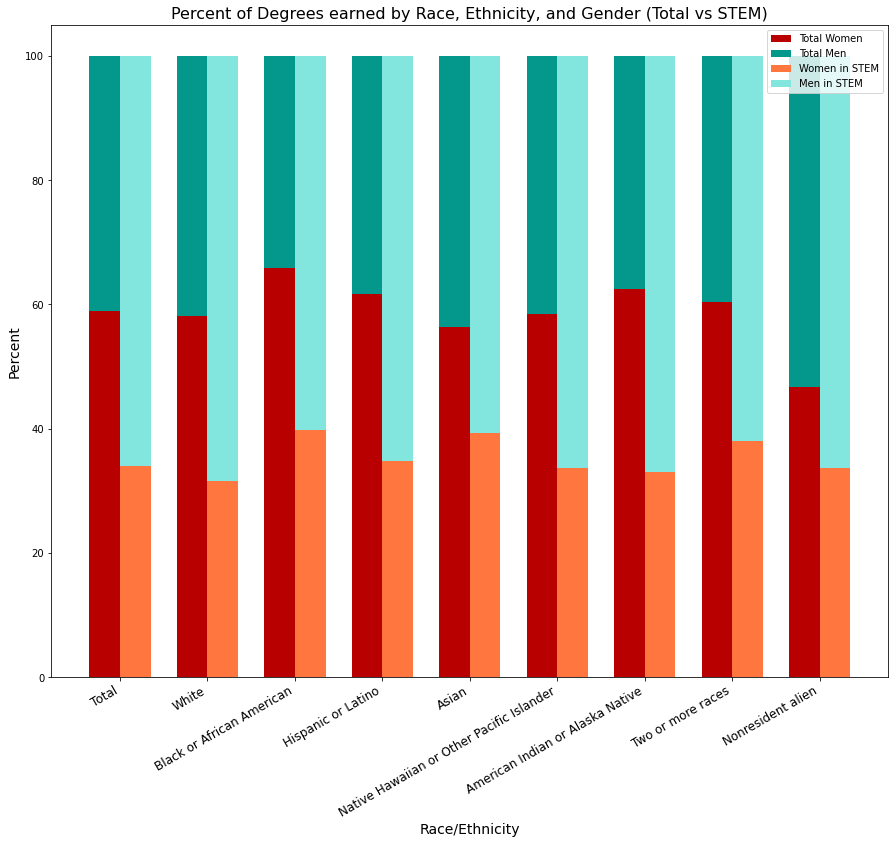

In [37]:
'''
This graph is for research paper
'''
labels = degreetest['Race']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x - width*0.5, degreetest['Fem Tot Per'], width, label='Total Women', color='#b80000')
rects1 = ax.bar(x-width*0.5, degreetest['Male Tot Per'], width, bottom=degreetest['Fem Tot Per'], label='Total Men', color='#03988b')
rects2 = ax.bar(x + width*0.5, stempercents['Fem Stem Per'], width, label='Women in STEM', color='#ff763f')
rects1 = ax.bar(x+width*0.5, stempercents['Male Stem Per'], width, bottom=stempercents['Fem Stem Per'], label='Men in STEM', color='#83E6DE')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent', fontsize=14)
ax.set_xlabel('Race/Ethnicity', fontsize=14)
ax.set_title('Percent of Degrees earned by Race, Ethnicity, and Gender (Total vs STEM)', fontsize=16)
ax.set_xticks(x, labels, ha='right', fontsize=12)
ax.legend()
ax.set_ylim(0,105)


# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()
fig.set_size_inches(15, 12)

plt.xticks(rotation=30)

plt.show()

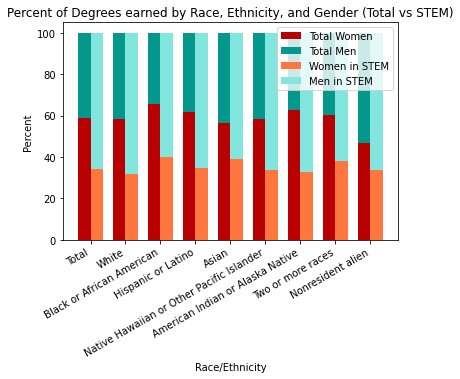

In [36]:
'''
This graph is for research presentation
'''
labels = degreetest['Race']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x - width*0.5, degreetest['Fem Tot Per'], width, label='Total Women', color='#b80000')
rects1 = ax.bar(x-width*0.5, degreetest['Male Tot Per'], width, bottom=degreetest['Fem Tot Per'], label='Total Men', color='#03988b')
rects2 = ax.bar(x + width*0.5, stempercents['Fem Stem Per'], width, label='Women in STEM', color='#ff763f')
rects1 = ax.bar(x+width*0.5, stempercents['Male Stem Per'], width, bottom=stempercents['Fem Stem Per'], label='Men in STEM', color='#83E6DE')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_xlabel('Race/Ethnicity')
ax.set_title('Percent of Degrees earned by Race, Ethnicity, and Gender (Total vs STEM)')
ax.set_xticks(x, labels, ha='right')
ax.legend()
ax.set_ylim(0,105)


# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()
# fig.set_size_inches(15, 12)

plt.xticks(rotation=30)

plt.show()